In [2]:
import colorsys
from pathlib import Path

import numpy as np
import cv2
import matplotlib.pyplot as plt


In [3]:
COLORS = [
    {
        "name": "red1",
        "hex": "#ff0000",
        "hue": 0
    },
    {
        "name": "orange",
        "hex": "#ff8000",
        "hue": 30
    },
    {
        "name": "yellow",
        "hex": "#ffff00",
        "hue": 60
    },
    {
        "name": "chartreuse",
        "hex": "#80ff00",
        "hue": 90
    },
    {
        "name": "green",
        "hex": "#00ff00",
        "hue": 120
    },
    {
        "name": "spring-green",
        "hex": "#00ff80",
        "hue": 150
    },
    {
        "name": "cyan",
        "hex": "#00ffff",
        "hue": 180
    },
    {
        "name": "azure",
        "hex": "#0080ff",
        "hue": 210
    },
    {
        "name": "blue",
        "hex": "#0000ff",
        "hue": 240
    },
    {
        "name": "violet",
        "hex": "#8000ff",
        "hue": 270
    },
    {
        "name": "magenta",
        "hex": "#ff00ff",
        "hue": 300
    },
    {
        "name": "rose",
        "hex": "#ff0080",
        "hue": 330
    },
    {
        "name": "red2",
        "hex": "#ff0000",
        "hue": 360
    }
]



In [4]:
print(np.round(0.06 / np.pi, 2))


0.02


In [5]:
image_path = Path("~/.wallpaper").expanduser()

image_raw = cv2.imread(image_path)


needable_size = 1000

height, width, _ = image_raw.shape
max_side = max(width, height)

if max_side > 2 * needable_size:
    scale = needable_size / max_side

    image_raw = cv2.resize(image_raw, (int(width * scale), int(height * scale)), interpolation=cv2.INTER_AREA)


image_rgb = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB) / 255
image_hsv = cv2.cvtColor(image_raw, cv2.COLOR_BGR2HSV) / 255
image_hsv[..., 0] *= np.pi * 2


In [6]:
color_stamps = np.linspace(0, np.pi * 2, 13)[:-1]

delta = np.pi / 12
color_d = []
for stamp in color_stamps:
    color_d.append([stamp - delta, stamp + delta])

color_d = np.array(color_d)


hue, saturation, value = cv2.split(image_hsv)

print(saturation.mean(), saturation.min(), saturation.max())
print(value.mean(), value.min(), value.max())



0.6461791989393623 0.0 1.0
0.2864438071313935 0.0 1.0


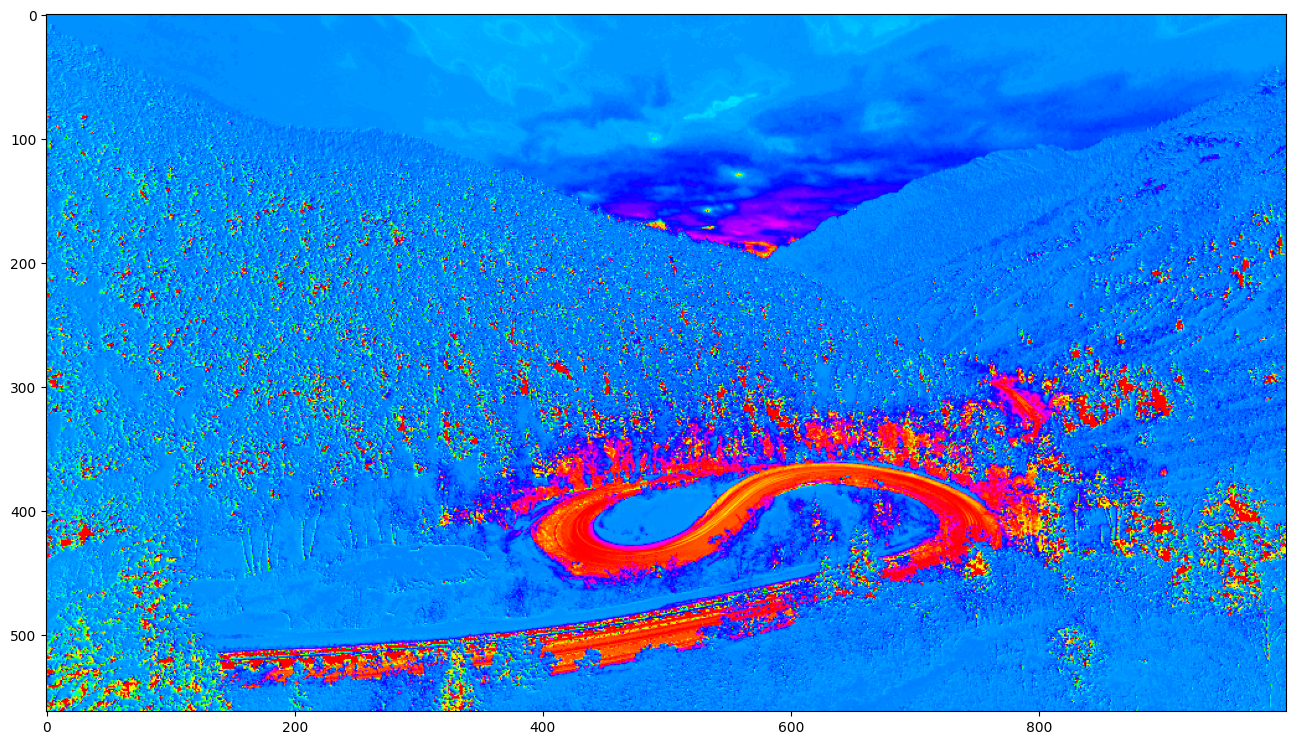

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

ax.imshow(hue, cmap="hsv")

fig.savefig("hue.png", dpi=200)



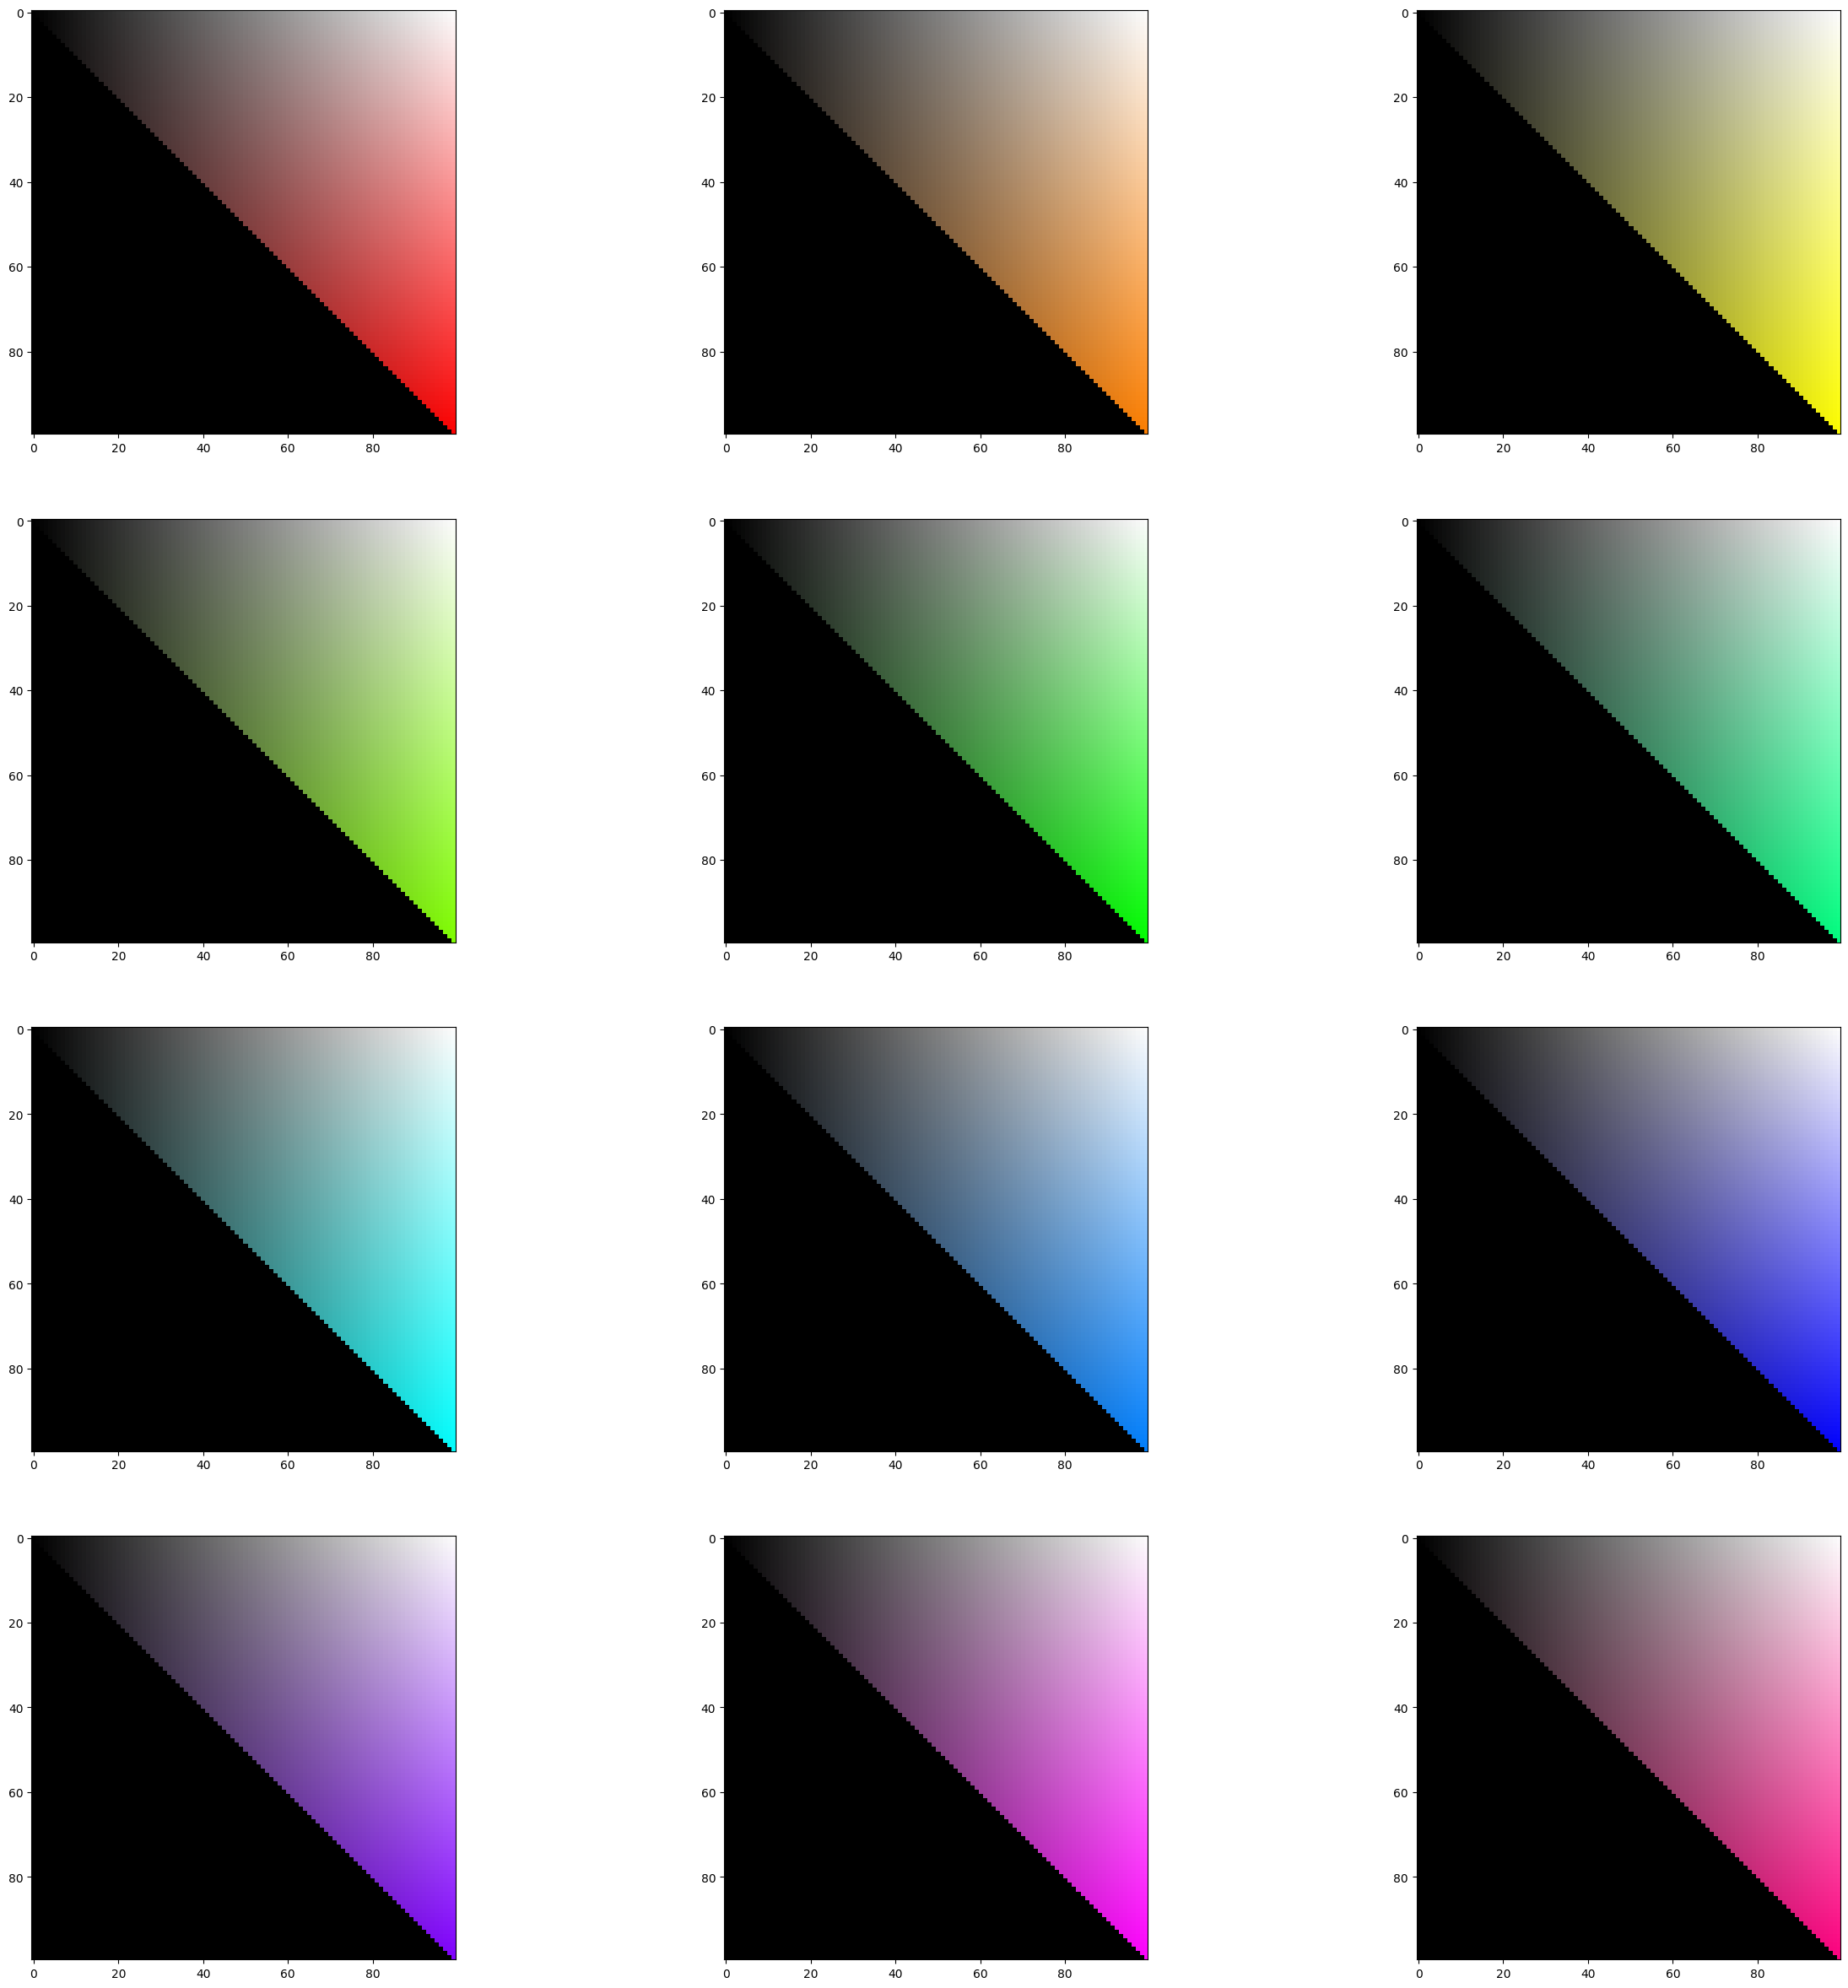

In [8]:
hue = hue.flatten()
saturation = saturation.flatten()
value = value.flatten()

hues = []
colors = []
for i, dist in enumerate(color_d):
    hues.append(hue[(hue >= dist[0]) & (hue <= dist[1])])
    colors.append(image_hsv[(image_hsv[..., 0] >= dist[0]) & (image_hsv[..., 0] <= dist[1])][..., 1:])


fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

X = np.linspace(0, 100, 100)
r1, r2 = 1.1, 0.95

for i, color_obj in enumerate(COLORS[:-1]):

    pattern = np.zeros((100, 100, 3), dtype=np.float64)
    grays = np.zeros((100, 100), dtype=np.float64)
    color = colors[i]

    pointsX = []
    pointsY = []
    for ii in range(100):
        for jj in range(100):
            if jj >= ii:
                r, g, b = colorsys.hsv_to_rgb(color_stamps[i] / (np.pi * 2), ii / 100, jj / 100)
            else:
                r, g, b = 0.0, 0.0, 0.0
            
            # if (1 - jj / 100) ** 2 / r1 ** 2 + (1 - ii / 100) ** 2 / r2 ** 2 > 1.0:
            #     grays[ii, jj] = 1.0
            
            pattern[ii, jj, 0] = r
            pattern[ii, jj, 1] = g
            pattern[ii, jj, 2] = b
    
    # pattern[..., 0] *= grays
    # pattern[..., 1] *= grays
    # pattern[..., 2] *= grays
    ax[i // 3][i % 3].imshow(pattern)
    # ax[i // 3][i % 3].imshow(grays, cmap="inferno")

fig.savefig("colors_scatters.png", dpi=200)



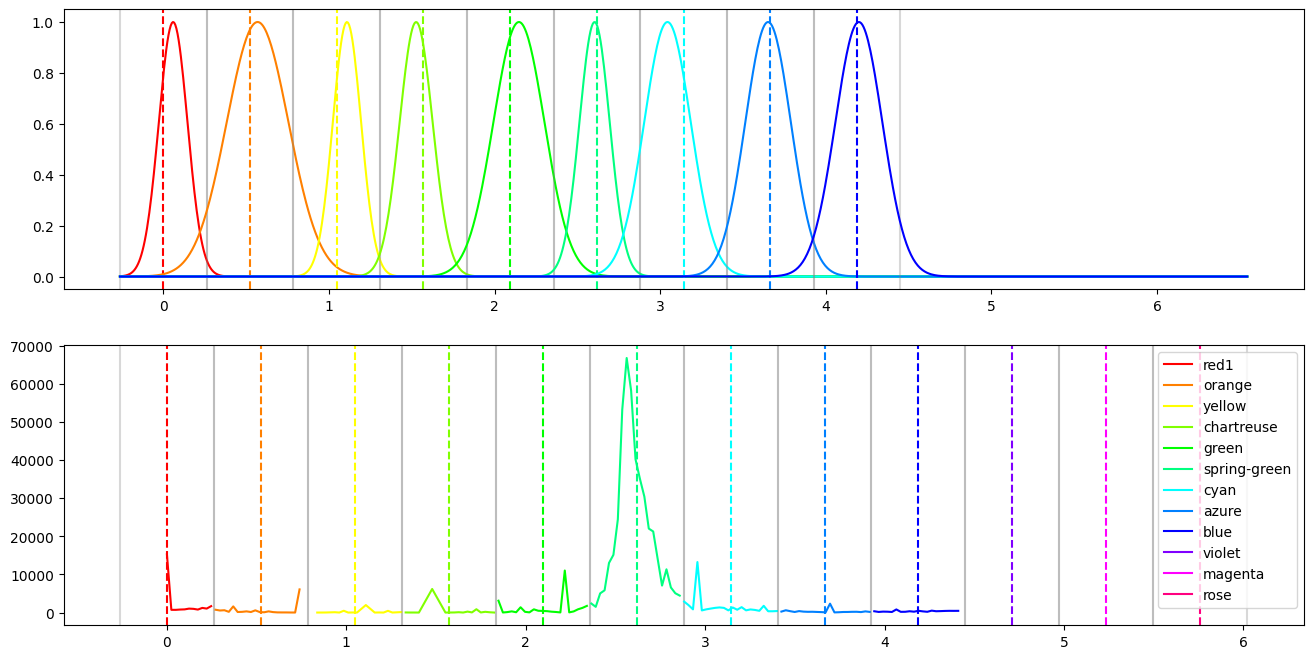

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

for i, color in enumerate(hues):
    if len(color) > 0:
        def gaus(x):
            return (np.exp(-(x - color.mean()) ** 2 / (2 * color.std() ** 2)))
        
        X = np.linspace(-np.pi / 12, 2 * np.pi + np.pi / 12, 1000)
        ax[0].axvline(x=color_stamps[i], linestyle="--", color=COLORS[i]["hex"])
        ax[0].axvline(x=color_d[i][0], color="gray", alpha=0.3)
        ax[0].axvline(x=color_d[i][1], color="gray", alpha=0.3)
        ax[0].plot(X, gaus(X), color=COLORS[i]["hex"])

    val, cnt = np.unique(color, return_counts=True)
    ax[1].axvline(x=color_stamps[i], linestyle="--", color=COLORS[i]["hex"])
    ax[1].axvline(x=color_d[i][0], color="gray", alpha=0.3)
    ax[1].axvline(x=color_d[i][1], color="gray", alpha=0.3)
    ax[1].plot(val, cnt, color=COLORS[i]["hex"], label=COLORS[i]["name"])

ax[1].legend()
fig.savefig("analyze2.png", dpi=200)
